# Domain Proyek
Akses untuk air minum yang aman sangat penting untuk kesehatan, hak asasi manusia dan komponen kebijakan yang efektif untuk perlindungan kesehatan. Hal ini penting sebagai masalah kesehatan dan pembangunan di tingkat nasional, regional dan lokal. Di beberapa daerah, telah terbukti bahwa investasi dalam penyediaan air dan sanitasi dapat menghasilkan keuntungan ekonomi bersih, karena pengurangan efek kesehatan yang merugikan dan biaya perawatan kesehatan lebih besar daripada biaya untuk melakukan intervensi.

referensi

- [Keuntungan Ekonomi terhadap Proyek Penyediaan Air Minum untuk Rumah Tangga di Negara Berkembang](https://www.adb.org/publications/economic-benefits-potable-water-supply-projects-households-developing-countries)
- [standar kualitas air minum WHO](https://www.who.int/publications/i/item/9789241549950)

# Business Understanding
Air minum yang aman sangat penting bagi kesehatan, tetapi masih banyak yang tidak mendapatkan air yang layak untuk diminum karena tidak mengetahui apakah air minum layak dikonsumsi atau tidak. berangkat dari masalah itu untuk memudahkan mengetahui antara air bisa diminum atau tidak maka dibuatlah model machine learning yang bisa membedakan antara air layak untuk diminum atau tidak.



## Problem Statements
Mengklasifikasikan kualitas air apakah layak minum atau tidak berdasarkan fitur yang disediakan.



## Goals
- Model dapat memprediksi apakah air minum layak untuk diminum atau tidak
- Model mempunyai akurasi yang lebih dari 0.85



## Solution statements


Solusi pada kasus kali ini adalah dengan menggunakan beberapa model machine learning untuk memprediksi apakah air minum dapat di minum atau tidak. Penggunaan beberapa model berfungsi untuk bisa membandingkan model mana yang lebih baik dalam menyelesaikan masalah klasifikasi air minum. model yang akan digunakan yaitu:

1. **Logistic Regression**\
   Logistic Regression adalah sebuah algoritma klasifikasi untuk mencari hubungan antara fitur (input) diskrit/kontinu dengan probabilitas hasil output diskrit tertentu.

2. **K-Nearest Neighbor(KNN)**\
   KNN adalah Algoritma yang menggunakan ‘kesamaan fitur’ untuk memprediksi nilai dari setiap data yang baru.

3. **Decision Tree**\
   Decision tree adalah model prediksi menggunakan struktur pohon atau struktur berhirarki.\
   Konsep dari pohon keputusan adalah mengubah data menjadi decision tree dan aturan-aturan keputusan.
   Kelebihan dari Decision Tree:\
   Kelebihan dari metode ini adalah mampu mengeliminasi perhitungan atau data-data yang kiranya tidak diperlukan. Sebab, sampel yang ada biasanya hanya diuji berdasarkan kriteria atau kelas tertentu saja.\
   salah satu kekurangan

4. **Boosting Algorithm(BaggingClassifier)**\
   Algoritma ini bertujuan untuk meningkatkan performa atau akurasi prediksi. Caranya adalah dengan menggabungkan beberapa model sederhana dan dianggap lemah (weak learners) sehingga membentuk suatu model yang kuat (strong ensemble learner).

5. **RandomForestClassifier**\
   Random forest adalah kombinasi dari masing–masing tree yang baik kemudian dikombinasikan ke dalam satu model.

6. **XGBoost**\
   XGBoost atau eXtreme Gradient Boosting adalah algoritma berbasis pohon. XGBoost adalah bagian dari keluarga pohon (Decision tree, Random Forest, bagging, boosting, gradient boosting).

# Import liblary yang dibutuhkan

In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Get Dataset Liblary
import os
from os.path import join

# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing liblary
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Modelling Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluasi Liblaries
from sklearn.metrics import accuracy_score

# Data Loading

In [ ]:
os.environ['KAGGLE_USERNAME'] = "ranau27"
os.environ['KAGGLE_KEY'] = "fa50d5f14c053dd0f2a4240b9857a488"

In [ ]:
!kaggle datasets download -d adityakadiwal/water-potability

  0% 0.00/251k [00:00<?, ?B/s]
100% 251k/251k [00:00<00:00, 34.3MB/s]


In [ ]:
!unzip water-potability.zip -d water-potability

Archive:  water-potability.zip
  inflating: water-potability/water_potability.csv  


# Data Understanding

Untuk mengetahui apa saja variabel tersebut dan kegunaannya kita dapat membaca dokumentasi dari penyedia dataset [Water Quality](https://www.kaggle.com/adityakadiwal/water-potability).

Dataset memiliki 3276 baris dan 10 kolom. Terdapat 9 kolom yang menampung data tentang sesuatu hal yang mempengaruhi air dan 1 kolom label yang berisikan bilangan biner yaitu 0 dan 1(0 adalah non-potable dan 1 adalah potable).

Deskripsi Variabel:

1. **pH**: indikator kondisi asam atau basa status air (0-14).
2. **Hardness**: Hardness adalah Kapasitas air untuk mengendapkan sabun dalam mg/L.
3. **Solids**: Total padatan terlarut dalam ppm.
4. **Chloramines**: Jumlah Kloramin dalam ppm.
5. **Sulfate**: Jumlah Sulfat yang dilarutkan dalam mg/L.
6. **Conductivity**: Konduktivitas listrik terhadap air dalam μS/cm..
7. **Organic_carbon**: Jumlah karbon organik dalam ppm.
8. **Trihalomethanes**: Jumlah Trihalomethanes dalam g/L.
9. **Turbidity**: Ukuran sifat pemancar cahaya terhadap air di NTU.
10. **Potability**: Menunjukkan apakah air aman untuk dikonsumsi manusia. Potable(1) dan Not potable(0)

In [ ]:
df = pd.read_csv('/content/water-potability/water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


## Exploratory Data Analysis Deskripsi Variabel
Pada tahap pertama saya mempelajari terlebih dahulu setiap variabel yang ada pada dataset. untuk mengetahui apa saja variabel tersebut dan kegunaannya kita dapat membaca dokumentasi dari penyedia dataset [Water Quality](https://www.kaggle.com/adityakadiwal/water-potability).

langkah selanjutnya saya memeriksa tipe data pada setiap variable dengan menggunakna code sebagai berikut

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Memeriksa Missing Value dan Menangani Missing Value

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
# Membuang Missing values karena kualitas air adalah data yang sensitif,
# kita tidak dapat mengubah data dengan memasukkan mean, median dan mode
df= df.dropna()

In [ ]:
df.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

## Memeriksa Distribusi Data

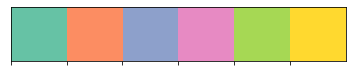

In [ ]:
colors = sns.color_palette('Set2')[0:6]
sns.palplot(colors)

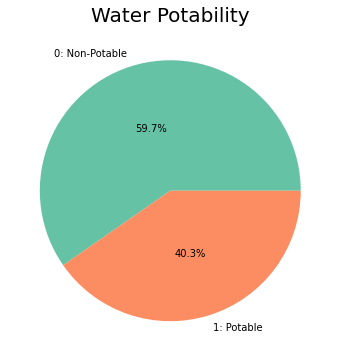

In [ ]:
labels = ['0: Non-Potable', '1: Potable']
data = [df['Potability'].value_counts()[0],
         df['Potability'].value_counts()[1]
        ]
fig1, ax1 = plt.subplots(figsize=[15,6])
ax1.pie(data, labels=labels, autopct='%1.1f%%',pctdistance=0.5, colors = colors)
plt.title("Water Potability", fontsize=20);
plt.show()

dataset yang kita punya tidak seimbang, karena non-Potable lebih banyak dari Potable. maka dari itu kita akan menyeimbangkan datanya agar tidak bias

In [ ]:
zero  = df[df['Potability'] == 0]
one = df[df['Potability'] == 1]

df_minority_upsampled = resample(one, replace = True, n_samples = 1200) 
df = pd.concat([zero, df_minority_upsampled])
df = shuffle(df)

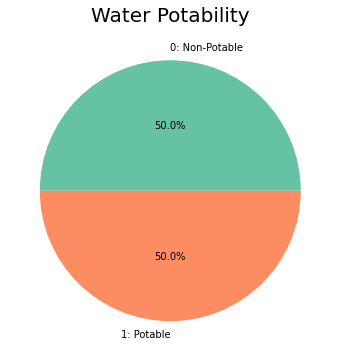

In [ ]:
labels = ['0: Non-Potable', '1: Potable']
data = [df['Potability'].value_counts()[0],
         df['Potability'].value_counts()[1]
        ]
fig1, ax1 = plt.subplots(figsize=[15,6])
ax1.pie(data, labels=labels, autopct='%1.1f%%',pctdistance=0.5, colors = colors)
plt.title("Water Potability", fontsize=20);
plt.show()

## Menganalisis korelasi

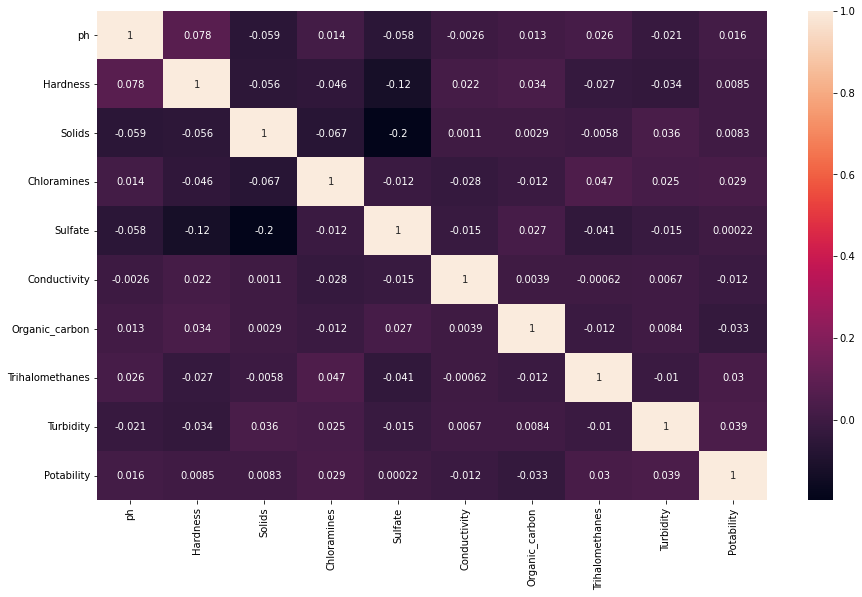

In [ ]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot = True)

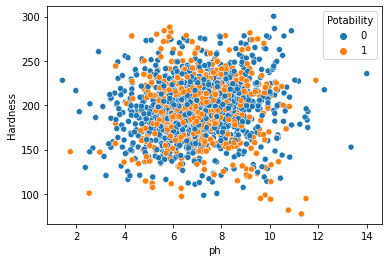

In [ ]:
sns.scatterplot(x=df["ph"], y=df["Hardness"], hue=df.Potability,
data=df)

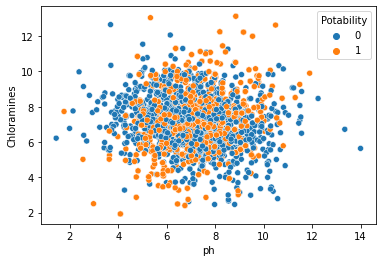

In [ ]:
sns.scatterplot(x=df["ph"], y=df["Chloramines"], hue=df.Potability,
data=df)

In [ ]:
df.corr().abs()['Potability'].sort_values(ascending = False)

Potability         1.000000
Turbidity          0.039296
Organic_carbon     0.032550
Trihalomethanes    0.029843
Chloramines        0.028680
ph                 0.015669
Conductivity       0.011534
Hardness           0.008486
Solids             0.008273
Sulfate            0.000218
Name: Potability, dtype: float64

dari sini kita bisa lihat tidak adanya pola secara khusus

# Data Preparation

## Train-Test-Split

In [ ]:
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [ ]:
print(f'Total feature dari semua sample dataset: {len(X)}')
print(f'Total feature dari sample train dataset: {len(X_train)}')
print(f'Total feature dari sample test dataset: {len(X_test)}')

print(f'Total label dari semua sample dataset: {len(y)}')
print(f'Total label dari sample train dataset: {len(y_train)}')
print(f'Total label dari sample test dataset: {len(y_test)}')

Total feature dari semua sample dataset: 2400
Total feature dari sample train dataset: 2160
Total feature dari sample test dataset: 240
Total label dari semua sample dataset: 2400
Total label dari sample train dataset: 2160
Total label dari sample test dataset: 240


## Standarisasi

In [ ]:
X_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1597,6.539115,218.619699,23308.296877,7.177445,355.443831,585.166427,10.742146,40.773856,4.211672
516,5.412762,226.586488,45510.584319,7.070185,307.621462,420.124761,21.940190,58.851736,4.091206
1352,7.475537,215.429102,31359.386456,7.498495,337.462379,477.235053,12.186310,53.908820,4.015574
1394,7.371290,180.736526,25672.311996,7.377422,310.567467,298.053057,12.671607,27.559355,4.084697
422,6.252410,225.784101,23920.254778,7.018165,303.791688,484.585791,13.433506,67.401384,2.722908


In [ ]:
X_test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1977,7.176171,206.294901,25794.950190,7.794727,321.284079,485.254430,15.574877,49.151960,4.742967
84,6.395359,133.834229,23827.275015,5.127747,266.908428,573.400295,9.833875,95.026609,4.191218
845,6.592443,242.480473,9381.239931,7.303184,312.814395,440.601135,14.027297,70.929879,3.060827
2416,7.542300,230.150540,18877.493895,4.344707,278.250436,447.259353,17.555578,53.341682,4.317554
2385,7.608750,192.856644,25410.811872,5.955008,283.802967,432.209545,12.796347,81.103792,4.627464


In [ ]:
scaler = StandardScaler()

features = X_train.columns
test_features = X_test.columns

scaler.fit(X_train[features])
scaler.fit(X_test[test_features])

X_train[features] = scaler.transform(X_train.loc[:, features])
X_test[test_features] = scaler.transform(X_test.loc[:, test_features])

In [ ]:
X_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1597,-0.339652,0.609213,0.213224,0.054614,0.485492,2.044696,-1.193653,-1.682903,0.223261
516,-1.058861,0.835791,2.792186,-0.015711,-0.513650,-0.050286,2.375936,-0.509655,0.057509
1352,0.258281,0.518472,1.148418,0.265112,0.109810,0.674652,-0.733298,-0.830448,-0.046553
1394,0.191716,-0.468194,0.487822,0.185730,-0.452100,-1.599821,-0.578601,-2.540519,0.048554
422,-0.522722,0.812971,0.284307,-0.049819,-0.593665,0.767960,-0.335731,0.045214,-1.825157


In [ ]:
X_test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1977,0.067127,0.258693,0.502067,0.459338,-0.228200,0.776448,0.346872,-1.139167,0.954280
84,-0.431444,-1.802109,0.273507,-1.289280,-1.364258,1.895341,-1.483182,1.838081,0.195117
845,-0.305601,1.287820,-1.404508,0.137055,-0.405155,0.209634,-0.146449,0.274212,-1.360208
2416,0.300911,0.937154,-0.301447,-1.802684,-1.127292,0.294151,0.978258,-0.867255,0.368946
2385,0.343342,-0.123495,0.457447,-0.746882,-1.011284,0.103114,-0.538837,0.934496,0.795357


# Modeling
Pada tahap modeling saya menggunakan bebera model untuk perbandingan model yang saya pakai adalah Logistic Regression, KNN, Decision Tree, Boosting Algorithm(BaggingClassifier), RandomForestClassifier dan XGBoost.

di modeling ini saya juga memakai RandomizedSearchCV dan GridSearchCV untuk mendapatkan tunning terbaik dalam model.

selanjutnya saya membandingkan akurasi prediksi tiap model dengan menggunakan data baru yaitu X_test sebagai ukuran keberhasilan model yang dibuat.

model yang akan dipakai adalah model yang memiliki peforma terbaik.

model dengan peforma terbaik adalah Random Forest dimana Random forest memiliki akurasi terhadap data baru sebesar 0.88.

## Logistic Regression

In [ ]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

0.5236111111111111

In [ ]:
# Predict Logreg
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, logreg_pred)
logreg_acc

0.5541666666666667

## KNN

In [ ]:
#KNN Tunning
knn = KNeighborsClassifier()

para_knn = {'n_neighbors':np.arange(1, 30)}  
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5) 

grid_knn.fit(X_train, y_train)
print("Rekomendasi parameter untuk KNN:", grid_knn.best_params_)

Rekomendasi parameter untuk KNN: {'n_neighbors': 1}


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

1.0

In [ ]:
# Predict KNN
knn_pred = knn.predict(X_test)
knn_acc = round(accuracy_score(y_test, knn_pred), 2)
knn_acc

0.8

## Decision Tree

In [ ]:
# Decision Tree tunning
dt = DecisionTreeClassifier()
params_dt = {'criterion':['gini','entropy'],
             'max_depth':np.arange(1, 50), 
             'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}

grid_dt = GridSearchCV(dt, param_grid=params_dt, cv=5)
grid_dt.fit(X_train, y_train)
print("Rekomendasi parameter untuk deciseion:", grid_dt.best_params_)

Rekomendasi parameter untuk deciseion: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 1}


In [ ]:
dt = DecisionTreeClassifier(criterion='gini', 
                                       max_depth=27, 
                                       min_samples_leaf=1, 
                                       random_state=64)

dt.fit(X_train, y_train)
round(dt.score(X_train, y_train), 2)

1.0

In [ ]:
# Predict Decision Tree
decision_tree_pred = dt.predict(X_test)
dt_acc = round(accuracy_score(y_test, decision_tree_pred), 2)
dt_acc

0.78

### Bagging


In [ ]:
bagging = BaggingClassifier(DecisionTreeClassifier(criterion='gini',
                                                   max_depth=27,
                                                   min_samples_leaf=1,
                                                   random_state=64),
                            n_estimators = 100,
                            random_state = 13)
bagging.fit(X_train, y_train)
round(bagging.score(X_train, y_train), 2)

1.0

In [ ]:
bagging_pred = bagging.predict(X_test)
bagging_acc = round(accuracy_score(y_test, bagging_pred), 2)
bagging_acc

0.85

## Random Forest

In [ ]:
rf = RandomForestClassifier()

params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

grid_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)

Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 500}


In [ ]:
rf = RandomForestClassifier(n_estimators=200, min_samples_leaf=2, random_state=127)

rf.fit(X_train, y_train)
round(rf.score(X_train, y_train), 2)

1.0

In [ ]:
rf_pred = rf.predict(X_test)
rf_acc = round(accuracy_score(y_test, rf_pred), 2)
rf_acc

0.88

## XGBOOST

In [ ]:
xgb = XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)

# xgboost tuning
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)

rs_xgb.fit(X_train, y_train)
print("Best parameters for XGBoost:", rs_xgb.best_params_)

Best parameters for XGBoost: {'n_estimators': 250, 'learning_rate': 0.5}


In [ ]:
xgb = XGBClassifier(n_estimators=600, learning_rate=0.8)
xgb.fit(X_train, y_train)
round(xgb.score(X_train, y_train), 2)

1.0

In [ ]:
xgb_pred = xgb.predict(X_test)
xgb_acc = round(accuracy_score(y_test, xgb_pred), 2)
xgb_acc

0.82

In [ ]:
models = pd.DataFrame({
    'Model': [' Logistic Regression', 'KNN',
              'Decision Tree', 'bagging',
              'Random Forest', 'XGBOOST'],
    'Score': [logreg_acc, knn_acc, dt_acc, 
              bagging_acc, rf_acc, xgb_acc]})

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,0.880000
3,bagging,0.850000
5,XGBOOST,0.820000
1,KNN,0.800000
2,Decision Tree,0.780000
0,Logistic Regression,0.554167


random forest memiliki akurasi yang paling baik jadi kita akan menggunakan random forest sebagai model.

# Evaluasi
untuk proses evalusi model saya menggunakan matriks precision

**Precision** adalah kemampuan pengklasifikasi untuk tidak melabeli instance positif yang sebenarnya negatif. Untuk setiap kelas didefinisikan sebagai rasio positif benar dengan jumlah positif benar dan salah.

**Formula Precision**\
TP – True Positives\
FP – False Positives\
Precision – Accuracy of positive predictions.\
Precision = TP/(TP + FP)

In [ ]:
from sklearn.metrics import classification_report

y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       109
           1       0.89      0.89      0.89       131

    accuracy                           0.88       240
   macro avg       0.87      0.87      0.87       240
weighted avg       0.88      0.88      0.88       240



precision terhadap label 0 adalah 86% dan label 1 adalah 89%.
dengan pengertian bahwa model dapat memprediksi dengan benar terhadap label 0 sebanyak 86% dan terhadap label 1 sebanyak 89%.

Mencoba melakukan prediksi terhadap data X_test

In [ ]:
prediksi = X_test.iloc[:1].copy()
prediksi

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1977,0.067127,0.258693,0.502067,0.459338,-0.2282,0.776448,0.346872,-1.139167,0.95428


In [ ]:
pred_dict = {'y_true':y_test[:1]}
pred_dict

{'y_true': 1977    1
 Name: Potability, dtype: int64}

In [ ]:
pred_dict['prediksi_rf'] = rf.predict(prediksi).round(1)

In [ ]:
pd.DataFrame(pred_dict)

,y_true,prediksi_rf
1977,1,1
